In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('clean_HDBresale2020.csv')
data.head()

,Unnamed: 0,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block,latitude,longitude,postal_code,address
0,0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,61 years 04 months,1979,10 TO 12,1,406,1.362005,103.853880,560406,406 ANG MO KIO AVE 10
1,1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,60 years 07 months,1978,01 TO 03,2,108,1.370966,103.838202,560108,108 ANG MO KIO AVE 4
2,2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,62 years 05 months,1980,01 TO 03,3,602,1.380709,103.835368,560602,602 ANG MO KIO AVE 5
3,3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,62 years 01 month,1980,04 TO 06,4,465,1.366201,103.857201,560465,465 ANG MO KIO AVE 10
4,4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,62 years 05 months,1980,01 TO 03,5,601,1.381041,103.835132,560601,601 ANG MO KIO AVE 5


In [3]:
storey = data['storey_range'] 

In [4]:
lower_level = storey.str[:2].astype(int)
higher_level = storey.str[-2:].astype(int)

In [5]:
data['lower_level'] = lower_level
data['higher_level'] = higher_level
data['mean_level'] = ((lower_level + higher_level)/2).astype(int)
data.head()

,Unnamed: 0,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block,latitude,longitude,postal_code,address,lower_level,higher_level,mean_level
0,0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,61 years 04 months,1979,10 TO 12,1,406,1.362005,103.853880,560406,406 ANG MO KIO AVE 10,10,12,11
1,1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,60 years 07 months,1978,01 TO 03,2,108,1.370966,103.838202,560108,108 ANG MO KIO AVE 4,1,3,2
2,2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,62 years 05 months,1980,01 TO 03,3,602,1.380709,103.835368,560602,602 ANG MO KIO AVE 5,1,3,2
3,3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,62 years 01 month,1980,04 TO 06,4,465,1.366201,103.857201,560465,465 ANG MO KIO AVE 10,4,6,5
4,4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,62 years 05 months,1980,01 TO 03,5,601,1.381041,103.835132,560601,601 ANG MO KIO AVE 5,1,3,2


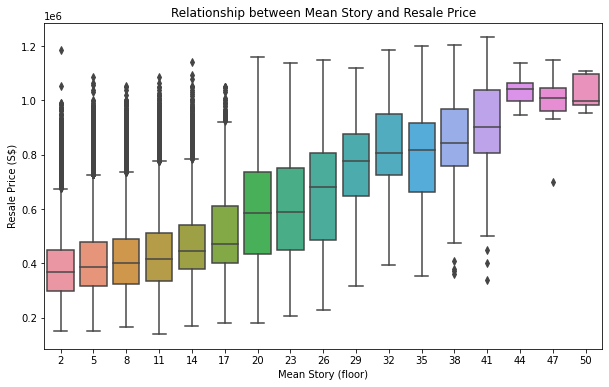

In [6]:
# figure 6

plt.figure(figsize=(10,6))
sns.boxplot(data['mean_level'], data['resale_price'])
plt.title('Relationship between Mean Story and Resale Price')
plt.xlabel('Mean Story (floor)')
plt.ylabel('Resale Price (S$)')
plt.show()

In [7]:
data['price_per_sqm'] = data['resale_price']/data['floor_area_sqm']

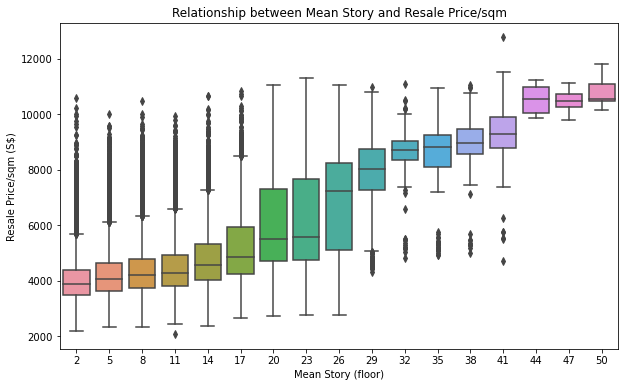

In [8]:
# figure 7

plt.figure(figsize=(10,6))
sns.boxplot(data['mean_level'], data['price_per_sqm'])
plt.title('Relationship between Mean Story and Resale Price/sqm')
plt.xlabel('Mean Story (floor)')
plt.ylabel('Resale Price/sqm (S$)')
plt.show()

In [9]:
hdb = pd.read_csv('HDB_Regions.csv')
hdb

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,...,pri_sch_count,sec_sch_dist,sec_sch_count,mall_dist,mall_count,MRT_dist,MRT_count,bus_stop_dist,bus_stop_count,region
0,0,0,0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,...,2.0,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,North-East
1,1,1,6018,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,235000.0,2017-05,...,2.0,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,North-East
2,2,2,22767,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,202000.0,2018-03,...,2.0,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,North-East
3,3,3,22768,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,210000.0,2018-03,...,2.0,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,North-East
4,4,4,26488,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,220000.0,2018-05,...,2.0,629.147363,0.0,1013.989167,0.0,1000.218504,0.0,92.026223,14.0,North-East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77878,77878,77878,77578,TOA PAYOH,EXECUTIVE,Maisonette,146.0,LOR 1 TOA PAYOH,760000.0,2020-08,...,0.0,170.595905,2.0,1047.539029,0.0,451.365504,1.0,103.430056,20.0,North-East
77879,77879,77879,77579,TOA PAYOH,EXECUTIVE,Apartment,144.0,LOR 2 TOA PAYOH,901000.0,2020-08,...,1.0,552.302673,0.0,821.540964,0.0,132.155416,1.0,98.795379,17.0,North-East
77880,77880,77880,77720,WOODLANDS,EXECUTIVE,Apartment,184.0,WOODLANDS ST 13,670888.0,2020-08,...,1.0,331.812603,2.0,155.236250,1.0,488.836892,1.0,160.293326,15.0,North
77881,77881,77881,77888,YISHUN,EXECUTIVE,Maisonette,145.0,YISHUN RING RD,610000.0,2020-08,...,2.0,828.482849,0.0,707.606919,0.0,1219.715175,0.0,143.031086,14.0,North


In [13]:
prices = hdb['resale_price']
prices

0        232000.0
1        235000.0
2        202000.0
3        210000.0
4        220000.0
           ...   
77878    760000.0
77879    901000.0
77880    670888.0
77881    610000.0
77882    530000.0
Name: resale_price, Length: 77883, dtype: float64

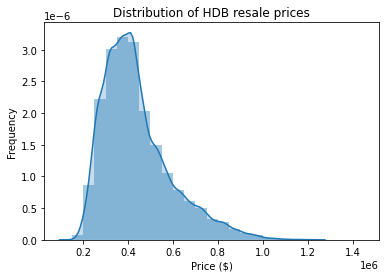

In [19]:
# figure 1

bins = np.arange(0.1e6, 1.5e6, 0.5e5)

sns.distplot(prices, bins=bins, kde_kws={"shade": True})
plt.title("Distribution of HDB resale prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

In [31]:
region_things = pd.read_csv("OCR_RCR_CCR.csv")
region_things

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,...,uni_poly_dist,uni_poly_count,price_per_sqm,region,Sec-Sch_distance_classification,Pri-Sch_distance_classification,Mall_distance_classification,MRT_distance_classification,Bus-Stop_distance_classification,Uni-Poly_distance_classification
0,0,0,0,0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,...,2052.608548,0.0,5272.727273,OCR,Medium,Near,Far,Far,Near,Near
1,1,1,1,6018,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,235000.0,...,2052.608548,0.0,5340.909091,OCR,Medium,Near,Far,Far,Near,Near
2,2,2,2,22767,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,202000.0,...,2052.608548,0.0,4590.909091,OCR,Medium,Near,Far,Far,Near,Near
3,3,3,3,22768,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,210000.0,...,2052.608548,0.0,4772.727273,OCR,Medium,Near,Far,Far,Near,Near
4,4,4,4,26488,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,220000.0,...,2052.608548,0.0,5000.000000,OCR,Medium,Near,Far,Far,Near,Near
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77878,77878,77878,77878,77578,TOA PAYOH,EXECUTIVE,Maisonette,146.0,LOR 1 TOA PAYOH,760000.0,...,1472.852461,0.0,5205.479452,OCR,Near,Medium,Far,Near,Near,Near
77879,77879,77879,77879,77579,TOA PAYOH,EXECUTIVE,Apartment,144.0,LOR 2 TOA PAYOH,901000.0,...,1236.827198,0.0,6256.944444,OCR,Medium,Near,Medium,Near,Near,Near
77880,77880,77880,77880,77720,WOODLANDS,EXECUTIVE,Apartment,184.0,WOODLANDS ST 13,670888.0,...,1309.487890,0.0,3646.130435,OCR,Near,Near,Near,Near,Near,Near
77881,77881,77881,77881,77888,YISHUN,EXECUTIVE,Maisonette,145.0,YISHUN RING RD,610000.0,...,5370.365100,0.0,4206.896552,OCR,Medium,Near,Medium,Far,Near,Near


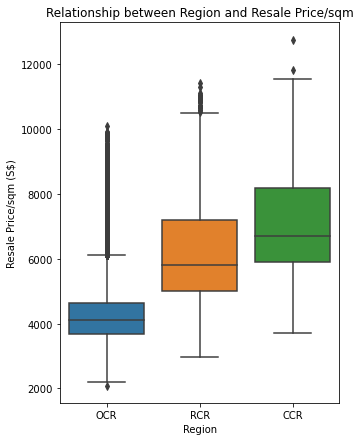

In [34]:
# figure 3.4

region_things['price_per_sqm'] = region_things['resale_price']/region_things['floor_area_sqm']

plt.figure(figsize=(5,7))
sns.boxplot(region_things['region'], region_things['price_per_sqm'])

plt.title('Relationship between Region and Resale Price/sqm')
plt.xlabel('Region')
plt.ylabel('Resale Price/sqm (S$)')
plt.show()